In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks/ML/data/

/content/drive/MyDrive/Colab Notebooks/ML/data


In [ ]:
ls

bo-de-thi-hoc-ki-2-mon-vat-ly-lop-6-nam-2018-2019.doc  final_data.xlsx
catboost_info/                                         laptops.csv
datalaptop-0-1.xlsx                                    laptops.xlsx
datalaptop-cleaned.xlsx                                traffic-signs-data.zip
detect-human-horse/


In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pf=pd.read_excel('final_data.xlsx')
pf.head()

,Unnamed: 0,Unnamed: 0.1,description,Price,Storage,RAM,ram_in_gb,processor_type,processor_name,disk_drive,storage_in_SSD,storage_in_HDD,Display,company,graphic_card_company,graphic_card,graphic_card_cl,processor_type_cl,touchscreen,display_cl
0,0,0,Laptop LG Gram 2021 17ZD90P-G.AX71A5 Trắng (Cp...,44850000,256Gb SSD,16GB LPDDR4X,16,i7-1165G7,Intel,SSD,256,0,17,LG,Intel,Iris Xe Graphics,Iris,i7,No,17.0
1,1,1,Laptop LG Gram 2021 16ZD90P-G.AX54A5 Trắng(Cpu...,39900000,512GB SSD,8GB LPDDR4X,8,i5-1135G7,Intel,SSD,512,0,16,LG,Intel,Iris Xe Graphics,Iris,i5,No,16.0
2,2,2,Laptop LG Gram 2021 14Z90P-G.AH75A5 Đen (Cpu i...,47900000,512GB SSD,16GB LPDDR4X,16,i7-1165G7,Intel,SSD,512,0,14,LG,Intel,Iris Xe Graphics,Iris,i7,No,14.0
3,3,3,Laptop Asus Gaming ROG Strix G512-IHN281T Đen ...,27450000,512GB SSD,8GB LPDDR4X,8,i7-10870H,Intel,SSD,512,0,15.6,Asus,NVIDIA,GeForce GTX 1650Ti 4GB GDDR6,GTX,i7,No,15.6
4,4,4,Laptop Gaming ASUS TUF F15 FX506LU-HN138T Gray...,28590000,512GB SSD,8GB LPDDR4X,8,I7-10870H,Intel,SSD,512,0,15.6,Asus,NVIDIA,Geforce GTX 1660Ti 6GB GDDR6,GTX,i7,No,15.6


In [ ]:
pf.shape

(1014, 69)

In [ ]:
pf.drop('Unnamed: 0',axis=1,inplace=True)
pf.drop('Unnamed: 0.1',axis=1,inplace=True)

In [ ]:
pf.dtypes # Checking the datatypes

description              object
Price                     int64
Storage                  object
RAM                      object
ram_in_gb                 int64
processor_type           object
processor_name           object
disk_drive               object
storage_in_SSD            int64
storage_in_HDD            int64
Display                  object
company                  object
graphic_card_company     object
graphic_card             object
graphic_card_cl          object
processor_type_cl        object
touchscreen              object
display_cl              float64
dtype: object

In [ ]:
print(pf['processor_name'].unique()) #done
print(pf['disk_drive'].unique()) #done
print(pf['company'].unique()) #done
print(pf['ram_in_gb'].unique()) #done
print(pf['display_cl'].unique()) #done
print(pf['touchscreen'].unique()) #done
print(pf['graphic_card_cl'].unique())  #done
print(pf['processor_type_cl'].unique()) #done
print(pf['storage_in_SSD'].unique()) #done
print(pf['storage_in_HDD'].unique()) #done

['Intel' 'AMD' 'Microsoft']
['SSD' 'Both' 'HDD' 'eMMC']
['LG' 'Asus' 'HP' 'MSI' 'Dell' 'Acer' 'Lenovo' 'Apple' 'Avita' 'Microsoft'
 'VGS']
[16  8  4 32 64  6]
[17.  16.  14.  15.6 15.  17.3 13.3 14.5 13.  18.4 11.6 12.5 15.4 13.5
 10.5 13.4 12.3 12.4 13.7]
['No' 'Yes']
['Iris' 'GTX' 'RTX' 'MX' 'UHD' 'HD' 'Vega' 'AMD' 'RX' 'Quadro' 'Onboard']
['i7' 'i5' 'Ryzen 7' 'Celeron' 'i3' 'Pentium' 'Ryzen 3' 'Ryzen 5' 'i9'
 'M1' 'Ryzen 9' 'M3' 'SQ2']
[ 256  512 1000    0  128 2000   64]
[   0 1000 2000  512]


In [ ]:
pf.columns

Index(['description', 'Price', 'Storage', 'RAM', 'ram_in_gb', 'processor_type',
       'processor_name', 'disk_drive', 'storage_in_SSD', 'storage_in_HDD',
       'Display', 'company', 'graphic_card_company', 'graphic_card',
       'graphic_card_cl', 'processor_type_cl', 'touchscreen', 'display_cl'],
      dtype='object')

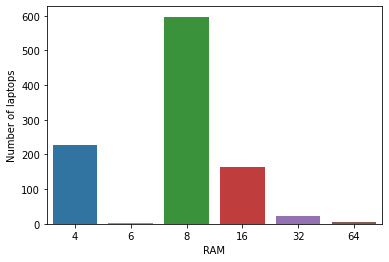

In [ ]:
sns.countplot(x='ram_in_gb',data=pf)
plt.xlabel('RAM')
plt.ylabel('Number of laptops') 
plt.show()

We can see that the maximum number of laptops have 8GB of RAM(above 100) and 4GB RAM will be fine for school purpose. 8GB RAM is optimal since its sufficient for college purpose and for normal games. Very few laptops have 32GB RAM. But if there are professional gamers then they prefer 16/32GB RAM laptops. Its obvious that as the size of the RAM increases, so does the price. Laptops with a higher RAM size are costly. But lets verify it now!

In [ ]:
pf.groupby('ram_in_gb')['Price'].mean()

ram_in_gb
4     1.228354e+07
6     1.798900e+07
8     2.284339e+07
16    4.402462e+07
32    7.701565e+07
64    8.039400e+07
Name: Price, dtype: float64

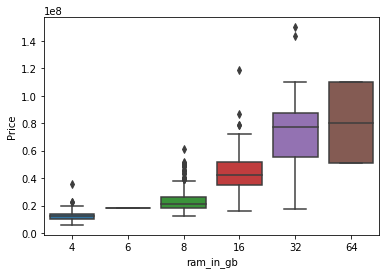

In [ ]:
sns.boxplot(x='ram_in_gb',y="Price",data=pf)
plt.show()

So its evident that as the size of the RAM increases, the Price of the laptop also increases. There are even a few outliers for 8 GB RAM which indicates that even though RAM is 8GB the Price is very high.So the other features of the laptop might be excellent. But what can the other features be which makes it so expensive? Let's find out

In [ ]:
pf[pf['ram_in_gb']==8]['Price'].idxmax() # The index of the laptop with maximum price(8GB RAM)

869

In [ ]:
pf['Price'][869]

60999000

In [ ]:
pf.iloc[869,:]

description             Microsoft Surface Pro 7 (i7 1065G7/16GB RAM/1T...
Price                                                            60999000
Storage                                                         1TB SSD\n
RAM                                                             8GB RAM\n
ram_in_gb                                                               8
processor_type                                                  i7 1065G7
processor_name                                                      Intel
disk_drive                                                            SSD
storage_in_SSD                                                       1000
storage_in_HDD                                                          0
Display                                                   15.6inchFHD60hz
company                                                         Microsoft
graphic_card_company                                              Onboard
graphic_card                          

So now we can understand the reason behind this Price. In general Apple Macbooks are very much expensive when compared to Windows/Linux laptops. Here the Macbook is of Intel i5 8th gen 256GB SSD which is pretty good for a Macbook! So that's the reason for a very high price of a 8GB RAM laptop.If it's a Windows one then the price won't be this high(given the same configurations of the processor,generation)

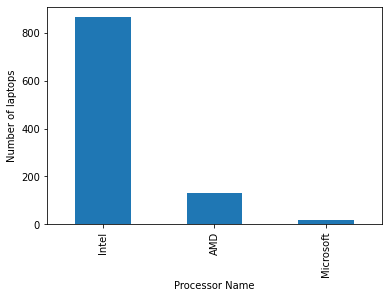

In [ ]:
pf['processor_name'].value_counts().plot(kind='bar')
plt.xlabel('Processor Name')
plt.ylabel('Number of laptops')
plt.show()

In [ ]:
a=pf['processor_name'].unique()
b=np.array(pf['processor_name'].value_counts())
b

array([865, 130,  19])

In [ ]:
pd.pivot_table(pf,index='processor_name',values='Price')

,Price
processor_name,
AMD,2.353152e+07
Intel,2.534863e+07
Microsoft,3.762426e+07


In [ ]:
grouped = pf.groupby(['processor_name','processor_type_cl'])
grouped.size()

processor_name  processor_type_cl
AMD             Ryzen 3               23
                Ryzen 5               58
                Ryzen 7               43
                Ryzen 9                6
Intel           Celeron               19
                M3                     3
                Pentium               23
                Ryzen 3                1
                Ryzen 5                2
                Ryzen 7                8
                Ryzen 9                1
                i3                    95
                i5                   420
                i7                   279
                i9                    14
Microsoft       M1                    16
                SQ2                    3
dtype: int64

Intel and AMD processors also have different type of CPUs and these inturn have different gens. Intel has i3,i5,i7,i9,Pentium CPUs and AMD has Ryzen3,Ryzen5,Ryzen7 CPUs. Core i7 CPUs are better than most Core i5 CPUs, which are in turn better than most Core i3 CPUs which are in turn better than Pentium CPU. They are just names to indicate the relative performance. Core i3 series has only dual-core processors, while the Core i5 and Core i7 series have both dual-core and quad-core processors. Quad-cores are usually better than dual-cores. In general i7 CPUs are expensive than i5 CPUs which are in turn expensive than i3 CPUs. As we go from i3 to i5 to i7 to i9 the performance,speed,price keeps increasing. Similar is the case with AMD Ryzen versions(Ryzen 7 > Ryzen 5 > Ryzen3)
So here most of the laptops have Intel processors and most of these Intel processors have i5 CPUs.

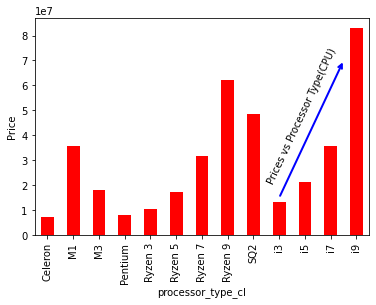

In [ ]:
pf.groupby('processor_type_cl')['Price'].mean().plot(kind='bar',color='red')
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(11.5, 70000000),        # place head of the arrow at point (between i7 and i9 , Price 230000)
             xytext=(9,15000000),        # place base of the arrow at point (top of i3 , Price 80000)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('Prices vs Processor Type(CPU)',   # text to display
             xy=(8.5,20000000),                     # start the text at at point (on top of i3 , Price 110000)
             rotation=65,                       # based on trial and error to match the arrow
             va='bottom',                       # want the text to be vertically 'bottom' aligned
             ha='left',                         # want the text to be horizontally 'left' algned.
            )
plt.ylabel('Price')
plt.show()

In [ ]:
pf['disk_drive'].value_counts()

SSD     916
HDD      72
Both     22
eMMC      4
Name: disk_drive, dtype: int64

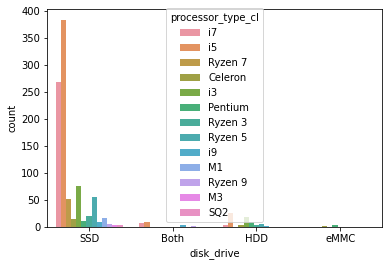

In [ ]:
sns.countplot(x="disk_drive", hue="processor_type_cl", data=pf)

In [ ]:
pf['company'].value_counts()

Asus         231
Dell         180
HP           154
Lenovo       109
MSI           96
Acer          93
Apple         56
Microsoft     50
LG            24
Avita         12
VGS            9
Name: company, dtype: int64

In [ ]:
So the maximum number of laptops are of Asus. We have already seen that the price of Apple Macbook is very high but let's see if there is any other company which beats Apple in terms of price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


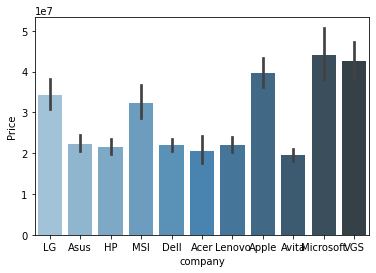

In [ ]:
sns.barplot("company", y="Price", data=pf, palette="Blues_d")

There are only 4 Alienware laptops but the price is very costly and this beats Apple mac as well. They are the most expensive among all the companies. After Alienware it's again Apple.

Previously I just stated that i9 processors are expensive than i7 which in turn as expensive than i5 and i3. But is that true?

In [ ]:
pd.pivot_table(pf, index = ['company','processor_type_cl'], values = 'Price').sort_values('company', ascending = False)

Price
company   processor_type_cl              
VGS       i7                 4.251011e+07
Microsoft i7                 6.761665e+07
          i5                 3.361805e+07
          i3                 1.849900e+07
          SQ2                4.866567e+07
...                                   ...
Acer      Pentium            7.929400e+06
          i5                 1.808880e+07
          i7                 3.949367e+07
          i9                 1.499990e+08
          Celeron            7.011750e+06

[64 rows x 1 columns]

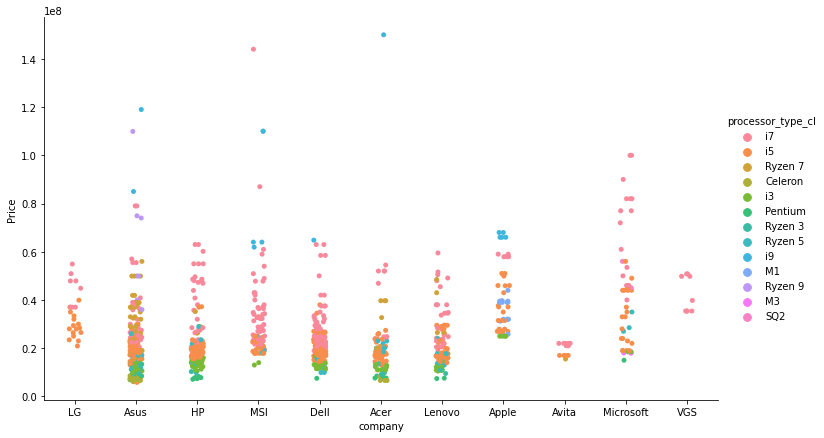

In [ ]:
sns.catplot(x="company", y="Price", hue="processor_type_cl", data=pf,height=6, aspect=10/6)

So from the table and the plot it is noticeable that the i9 processors are the most expensive, and then comes i7. For every company i9 laptops are costlier than i7 and i7 costlier than i5. There might be a few cases where i5 price > i7 price(this totally depends on the generation and other specifications such as RAM,SSD/HDD etc)

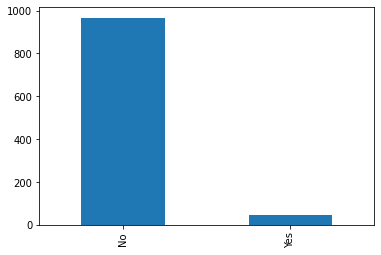

In [ ]:
pf['touchscreen'].value_counts().plot(kind='bar')

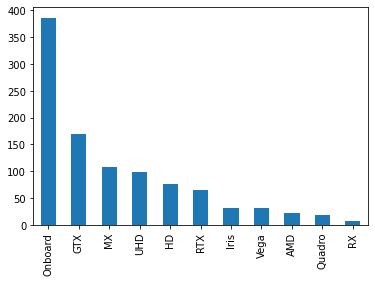

In [ ]:
pf['graphic_card_cl'].value_counts().plot(kind='bar')

Most of the laptops do not have the touchscreen facility. Most of the laptops do not have graphic card which is actually bad because 2GB Graphic card is a must these days even for basic purposes.

# Data Modeling using pycaret

In [ ]:
pf.columns

Index(['description', 'Price', 'Storage', 'RAM', 'ram_in_gb', 'processor_type',
       'processor_name', 'disk_drive', 'storage_in_SSD', 'storage_in_HDD',
       'Display', 'company', 'graphic_card_company', 'graphic_card',
       'graphic_card_cl', 'processor_type_cl', 'touchscreen', 'display_cl'],
      dtype='object')

In [ ]:
pf.drop(['description','Storage','RAM','processor_type','Display','graphic_card'],axis=1,inplace=True)
# Dropping the unnecessary columns(as I already created the new features I am dropping the old features)

In [ ]:
pf.columns

Index(['Price', 'ram_in_gb', 'processor_name', 'disk_drive', 'storage_in_SSD',
       'storage_in_HDD', 'company', 'graphic_card_company', 'graphic_card_cl',
       'processor_type_cl', 'touchscreen', 'display_cl'],
      dtype='object')

In [ ]:
pf.dtypes

Price                     int64
ram_in_gb                 int64
processor_name           object
disk_drive               object
storage_in_SSD            int64
storage_in_HDD            int64
company                  object
graphic_card_company     object
graphic_card_cl          object
processor_type_cl        object
touchscreen              object
display_cl              float64
dtype: object

In [ ]:
pf.head()

,Price,ram_in_gb,processor_name,disk_drive,storage_in_SSD,storage_in_HDD,company,graphic_card_company,graphic_card_cl,processor_type_cl,touchscreen,display_cl
0,44850000,16,Intel,SSD,256,0,LG,Intel,Iris,i7,No,17.0
1,39900000,8,Intel,SSD,512,0,LG,Intel,Iris,i5,No,16.0
2,47900000,16,Intel,SSD,512,0,LG,Intel,Iris,i7,No,14.0
3,27450000,8,Intel,SSD,512,0,Asus,NVIDIA,GTX,i7,No,15.6
4,28590000,8,Intel,SSD,512,0,Asus,NVIDIA,GTX,i7,No,15.6


In [ ]:
Y = pf['Price']
X = pf.drop('Price',axis=1)

In [ ]:
!pip install pycaret==2.0

     |████████████████████████████████| 256kB 9.1MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 256kB 13.3MB/s 
     |████████████████████████████████| 22.3MB 1.9MB/s 
     |████████████████████████████████| 14.2MB 223kB/s 
     |████████████████████████████████| 112kB 53.4MB/s 
     |████████████████████████████████| 1.7MB 45.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 276kB 29.3MB/s 
     |████████████████████████████████| 2.0MB 36.3MB/s 
     |████████████████████████████████| 67.3MB 43kB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
     |████████████████████████████████| 256kB 56.9MB/s 
     |████████████████████████████████| 10.1MB 42.8MB/s 
     |████████████████████████████████| 1.1MB 31.7MB/s 
     |████████████████████████████████| 112kB 55.6M

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [ ]:
from pycaret.regression import *
reg = setup(data = pf, target = 'Price',train_size=0.8, folds_shuffle = True,data_split_shuffle = False,numeric_features = ['ram_in_gb','storage_in_SSD','storage_in_HDD']) # setup variable,in the target we mention the feature name(dependent variable)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1630
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1014, 12)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models(blacklist = ['lar', 'svm','par'])
# Training all the regression models
# So after this we can create any model-either CatBoost or else ExtraTrees regressor model and then we can perform hyperparameter tuning

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,3480146.1000,47122778392093.5859,6436799.1532,0.7769,0.1797,0.1304,1.4984
1,Gradient Boosting Regressor,3814602.9306,46758684169033.7656,6526402.3664,0.7707,0.1968,0.1499,0.1052
2,Extreme Gradient Boosting,3884192.4753,47986601722947.2734,6629346.4189,0.7617,0.1985,0.1522,0.1143
3,Random Forest,3695779.1680,48283944657970.5469,6679563.7268,0.7587,0.1931,0.1368,0.4499
4,Ridge Regression,4132718.7539,48172244490907.4531,6590914.9862,0.7562,0.2167,0.1707,0.0104
5,Random Sample Consensus,3881861.0656,48491643644211.9766,6638169.3299,0.7532,0.2047,0.1482,0.5477
6,Bayesian Ridge,4147052.7761,49069871304773.2969,6635872.9368,0.7523,0.2169,0.1709,0.0215
7,Lasso Least Angle Regression,4170662.1827,50102046081773.5859,6699370.7535,0.7492,0.2559,0.1719,0.0223
8,Linear Regression,4179120.0060,50230120072246.0625,6709473.1549,0.7489,0.2577,0.1727,0.0123
9,Lasso Regression,4195095.3783,50425148015159.2344,6728284.4968,0.7479,0.2579,0.1731,0.0554


In [ ]:
best = automl(optimize = 'R2', use_holdout = False)

In [ ]:
print(best)

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [ ]:
cbr = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4826038.7307,132906854590212.9219,11528523.5217,0.7131,0.2144,0.1523
1,2387560.8104,14007465642747.4004,3742654.8923,0.8505,0.1452,0.1018
2,3313125.7205,31827308856282.5234,5641569.7156,0.8200,0.1803,0.1449
3,3353088.8902,22914532452915.1406,4786912.6222,0.8174,0.1703,0.1380
4,2341048.2131,11684207316841.8340,3418216.9792,0.8884,0.1381,0.1077
5,3526847.0625,33258030262540.1914,5766977.5674,0.8105,0.1791,0.1246
6,3787875.5225,62009929381218.0234,7874638.3651,0.8014,0.1746,0.1157
7,3973457.9822,38305274100759.5859,6189125.4714,0.7722,0.1945,0.1352
8,3674415.3111,48337307678586.4297,6952503.6986,0.7199,0.1887,0.1304
9,3259750.8535,25093622743259.0352,5009353.5255,0.8135,0.2077,0.1613


In [ ]:
cbr = tune_model(cbr, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3572868.1524,59538813093547.6719,7716139.7793,0.7906,0.1886,0.1382
1,3209405.1294,21211139284062.9141,4605555.2634,0.8598,0.1765,0.1420
2,3341091.1433,28698963800443.2852,5357141.3833,0.7998,0.1847,0.1322
3,3844974.1764,44570126720421.2500,6676086.1828,0.8147,0.1836,0.1297
4,3488481.7549,32521894748583.4766,5702797.0987,0.7890,0.1929,0.1476
Mean,3491364.0713,37308187529411.7188,6011543.9415,0.8108,0.1852,0.1380
SD,216228.6416,13439336053533.7734,1081446.7019,0.0262,0.0054,0.0065


In [ ]:
# FinalCatBoost parameters for deployment
final_model = finalize_model(cbr)

In [ ]:
pf.dtypes

Price                     int64
ram_in_gb                 int64
processor_name           object
disk_drive               object
storage_in_SSD            int64
storage_in_HDD            int64
company                  object
graphic_card_company     object
graphic_card_cl          object
processor_type_cl        object
touchscreen              object
display_cl              float64
dtype: object

# Preprocessing data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datalaptop-0-1.xlsx to datalaptop-0-1 (1).xlsx


In [ ]:
df=pd.read_excel('datalaptop-0-1.xlsx')
df.head()

,Unnamed: 0,Price,display,ram_in_gb,storage_in_SSD,storage_in_HDD,processor_name,disk_drive,company,graphic_card_company,graphic_card,processor_type,touchscreen,processer_chip_name,processor_name_Intel,processor_name_AMD,processor_name_Microsoft,processor_name_Apple,company_name,company_name_LG,company_name_Asus,company_name_HP,company_name_MSI,company_name_Dell,company_name_Acer,company_name_Lenovo,company_name_Apple,company_name_Avita,company_name_Microsoft,company_name_VGS,disk_drive_name,disk_drive_SSD,disk_drive_Both,disk_drive_HDD,disk_drive_eMMC,graphic_card_company_name,graphic_card_company_Intel,graphic_card_company_NVIDIA,graphic_card_company_Radeon,graphic_card_company_AMD,graphic_card_company_Onboard,graphic_card_name,graphic_card_Iris,graphic_card_GTX,graphic_card_RTX,graphic_card_MX,graphic_card_UHD,graphic_card_HD,graphic_card_Vega,graphic_card_AMD,graphic_card_RX,graphic_card_Quadro,graphic_card_Onboard,processor_type_name,processor_type_SQ2,processor_type_M3,processor_type_Celeron,processor_type_Pentium,processor_type_i9,processor_type_i7,processor_type_i5,processor_type_i3,processor_type_Ryzen9,processor_type_Ryzen7,processor_type_Ryzen5,processor_type_Ryzen3,processor_type_M1,touchscreen_name,touchscreen_binary
0,0,44850000,17.0,16,256,0,Intel,SSD,LG,Intel,Iris,i7,No,Intel,1,0,0,0,LG,1,0,0,0,0,0,0,0,0,0,0,SSD,1,0,0,0,Intel,1,0,0,0,0,Iris,1,0,0,0,0,0,0,0,0,0,0,i7,0,0,0,0,0,1,0,0,0,0,0,0,0,No,0
1,1,39900000,16.0,8,512,0,Intel,SSD,LG,Intel,Iris,i5,No,Intel,1,0,0,0,LG,1,0,0,0,0,0,0,0,0,0,0,SSD,1,0,0,0,Intel,1,0,0,0,0,Iris,1,0,0,0,0,0,0,0,0,0,0,i5,0,0,0,0,0,0,1,0,0,0,0,0,0,No,0
2,2,47900000,14.0,16,512,0,Intel,SSD,LG,Intel,Iris,i7,No,Intel,1,0,0,0,LG,1,0,0,0,0,0,0,0,0,0,0,SSD,1,0,0,0,Intel,1,0,0,0,0,Iris,1,0,0,0,0,0,0,0,0,0,0,i7,0,0,0,0,0,1,0,0,0,0,0,0,0,No,0
3,3,27450000,15.6,8,512,0,Intel,SSD,Asus,NVIDIA,GTX,i7,No,Intel,1,0,0,0,Asus,0,1,0,0,0,0,0,0,0,0,0,SSD,1,0,0,0,NVIDIA,0,1,0,0,0,GTX,0,1,0,0,0,0,0,0,0,0,0,i7,0,0,0,0,0,1,0,0,0,0,0,0,0,No,0
4,4,28590000,15.6,8,512,0,Intel,SSD,Asus,NVIDIA,GTX,i7,No,Intel,1,0,0,0,Asus,0,1,0,0,0,0,0,0,0,0,0,SSD,1,0,0,0,NVIDIA,0,1,0,0,0,GTX,0,1,0,0,0,0,0,0,0,0,0,i7,0,0,0,0,0,1,0,0,0,0,0,0,0,No,0


In [ ]:
df.drop(['Unnamed: 0','processor_name','disk_drive','company','graphic_card_company','graphic_card','processor_type','touchscreen','processer_chip_name','company_name',
         'disk_drive_name','graphic_card_company_name','graphic_card_name','touchscreen_name','processor_type_name'],axis=1,inplace=True)

In [ ]:
df.corr()

,Price,display,ram_in_gb,storage_in_SSD,storage_in_HDD,processor_name_Intel,processor_name_AMD,processor_name_Microsoft,processor_name_Apple,company_name_LG,company_name_Asus,company_name_HP,company_name_MSI,company_name_Dell,company_name_Acer,company_name_Lenovo,company_name_Apple,company_name_Avita,company_name_Microsoft,company_name_VGS,disk_drive_SSD,disk_drive_Both,disk_drive_HDD,disk_drive_eMMC,graphic_card_company_Intel,graphic_card_company_NVIDIA,graphic_card_company_Radeon,graphic_card_company_AMD,graphic_card_company_Onboard,graphic_card_Iris,graphic_card_GTX,graphic_card_RTX,graphic_card_MX,graphic_card_UHD,graphic_card_HD,graphic_card_Vega,graphic_card_AMD,graphic_card_RX,graphic_card_Quadro,graphic_card_Onboard,processor_type_SQ2,processor_type_M3,processor_type_Celeron,processor_type_Pentium,processor_type_i9,processor_type_i7,processor_type_i5,processor_type_i3,processor_type_Ryzen9,processor_type_Ryzen7,processor_type_Ryzen5,processor_type_Ryzen3,processor_type_M1,touchscreen_binary
Price,1.000000,0.119406,0.765354,0.489692,-0.081568,0.000440,-0.043179,0.078843,0.080223,0.086749,-0.101221,-0.101072,0.138410,-0.097202,-0.094203,-0.071162,0.215304,-0.038913,0.263099,0.100813,0.101146,-0.190625,0.159035,-0.065358,-0.021528,0.200984,-0.025412,0.003294,-0.146604,0.042474,0.121426,0.414516,-0.087291,-0.166750,-0.110898,-0.087893,0.080839,-0.000476,0.209872,-0.152319,0.078843,-0.024839,-0.154721,-0.163021,0.423710,0.398415,-0.221143,-0.238358,0.190150,0.089474,-0.126661,-0.145213,0.080223,0.243273
display,0.119406,1.000000,0.123216,0.150344,0.121606,-0.024702,0.079838,-0.012261,-0.138658,0.076745,0.084674,-0.055949,0.255645,0.020007,0.052241,-0.037059,-0.198530,-0.053495,-0.319428,0.075764,-0.100189,0.048838,0.147794,-0.071336,0.020057,0.347472,-0.002035,0.065085,-0.344535,-0.025587,0.290614,0.233742,0.055510,-0.043887,-0.075044,-0.033088,0.071023,0.082458,0.064950,-0.342290,-0.012261,-0.200633,0.039659,-0.005561,0.103646,0.189236,-0.177295,-0.058283,0.034289,0.125928,-0.002796,0.015147,-0.138658,-0.162067
ram_in_gb,0.765354,0.123216,1.000000,0.570017,-0.114628,-0.019663,-0.006949,0.107658,0.027586,0.012861,-0.039484,-0.113426,0.166689,-0.089822,-0.064157,-0.087962,0.055478,-0.020567,0.217451,0.309912,0.130817,-0.174120,0.064310,-0.052688,-0.068376,0.220767,-0.043772,-0.010141,-0.107135,-0.008286,0.131633,0.363133,-0.051394,-0.156822,-0.136176,-0.092885,0.033544,0.022998,0.178401,-0.110414,0.107658,-0.010237,-0.115692,-0.123245,0.328960,0.340161,-0.187277,-0.236218,0.200866,0.085662,-0.082411,-0.130355,0.027586,0.196124
storage_in_SSD,0.489692,0.150344,0.570017,1.000000,-0.420058,-0.068104,0.081315,-0.016333,-0.017541,0.009233,0.064769,-0.050065,0.145194,-0.164739,0.034822,-0.056360,-0.059348,0.155560,-0.026041,0.209166,0.441600,-0.439631,-0.077542,-0.100073,-0.109704,0.227989,-0.066716,-0.013981,-0.063878,0.004506,0.062935,0.326765,0.034541,-0.117990,-0.175697,-0.055093,-0.028410,0.005740,0.064721,-0.061438,-0.016333,-0.060264,-0.121203,-0.162129,0.197543,0.273210,-0.117219,-0.226321,0.116684,0.158351,-0.020965,-0.090632,-0.017541,0.138696
storage_in_HDD,-0.081568,0.121606,-0.114628,-0.420058,1.000000,0.063921,-0.050107,-0.017093,-0.039730,-0.048856,0.085448,-0.025205,-0.021282,0.086927,-0.082140,0.053779,-0.075864,-0.034339,-0.071462,-0.029694,-0.959313,0.847692,0.459713,-0.019747,0.068744,0.042260,0.046766,0.014725,-0.125141,-0.046821,0.029972,0.012376,-0.010491,0.078973,0.120996,0.041684,0.034118,-0.026161,-0.042182,-0.128581,-0.017093,-0.017093,0.055574,0.132941,0.106581,-0.103206,-0.021901,0.117793,0.014344,-0.072210,-0.007620,0.039394,-0.039730,-0.069177
processor_name_Intel,0.000440,-0.024702,-0.019663,-0.068104,0.063921,1.000000,-0.923976,-0.131250,-0.305077,0.064621,-0.219535,0.059211,0.105671,0.149075,-0.041830,-0.008842,-0.094765,0.019661,0.017331,0.039276,-0.069764,0.049671,0.042688,0.026119,0.194474,-0.062505,-0.196173,-0.141240,-0.018194,0.074921,0.007310,-0.127617,0.089119,0.107472,0.054667,-0.298437,0

In [ ]:
X = df.drop('Price',axis=1)
Y = df['Price'].values

In [ ]:
for i in range(len(df['Price'])):
  if df['Price'][i]==Y.max():
    print(i)
    print(pf['description'][i])

923
Laptop Đồ họa ConceptD 7 Ezel Pro CC715-91P-X8CX (NX.C5FSV.001) (Xeon W 10885M/32GB RAM/2TB SSD/Quadro RTX5000 16G/15.6 inch UHD 4K Touch/Bút/Win10 Pro/Trắng)


In [ ]:
min_max_scaler=MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)
# Y_scale=min_max_scaler.fit_transform(Y)
Y_scale=Y/1000
X_scale

array([[0.82278481, 0.2       , 0.128     , ..., 0.        , 0.        ,
        0.        ],
       [0.69620253, 0.06666667, 0.256     , ..., 0.        , 0.        ,
        0.        ],
       [0.44303797, 0.2       , 0.256     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.64556962, 0.06666667, 0.128     , ..., 0.        , 0.        ,
        0.        ],
       [0.44303797, 0.06666667, 0.256     , ..., 0.        , 0.        ,
        0.        ],
       [0.35443038, 0.06666667, 0.128     , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
pf.iloc[923,:]

description             Laptop Đồ họa ConceptD 7 Ezel Pro CC715-91P-X8...
Price                                                           149999000
Storage                                                         2TB SSD\n
RAM                                                                32GB\n
ram_in_gb                                                              32
processor_type                                              Xeon W 10885M
processor_name                                                      Intel
disk_drive                                                            SSD
storage_in_SSD                                                       2000
storage_in_HDD                                                          0
Display                                               15.6inchUHD4Kcảmứng
company                                                              Acer
graphic_card_company                                                Intel
graphic_card                          

In [ ]:
data_reshaped=X_scale.reshape(X_scale.shape[0],X_scale.shape[1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val_test,Y_train,Y_val_test = train_test_split(X_scale,Y_scale,test_size=0.2)
X_test,X_validation,Y_test,Y_validation=train_test_split(X_val_test,Y_val_test,test_size=0.5)

#GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(X_train, Y_train)

GradientBoostingRegressor()

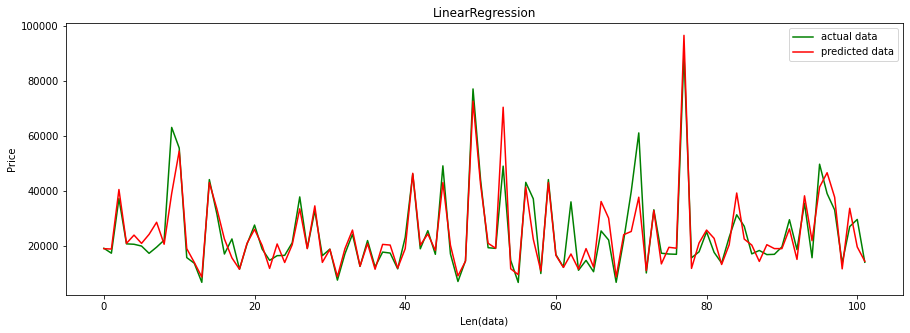

In [ ]:
y_GBR = reg.predict(X_validation)
plt.figure(figsize=(15,5))
plt.plot(Y_validation, 'g-', label='actual data')
plt.plot(y_GBR, 'r-', label='predicted data')
plt.title('LinearRegression')
plt.xlabel('Len(data)')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [ ]:
reg.score(X_validation, Y_validation)

0.8329965192554293

# Linear model

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lm.score(X_test,Y_test)

0.7871442383421033

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
y_linear = lm.predict(X_validation)
mean_absolute_error(y_linear,Y_validation)

4130.71568627451

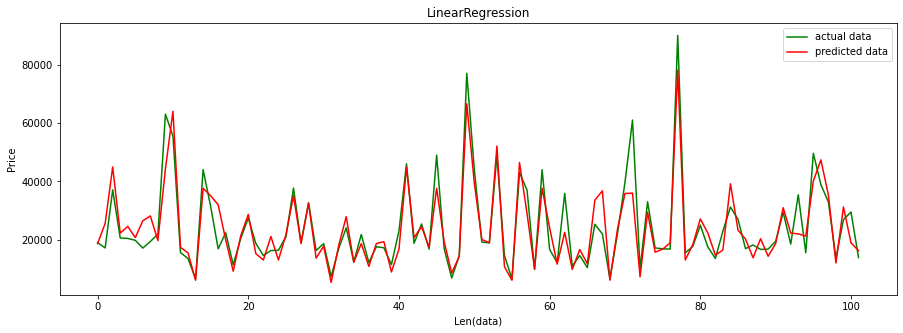

In [ ]:
y_linear = lm.predict(X_validation)
plt.figure(figsize=(15,5))
plt.plot(Y_validation, 'g-', label='actual data')
plt.plot(y_linear, 'r-', label='predicted data')
plt.title('LinearRegression')
plt.xlabel('Len(data)')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

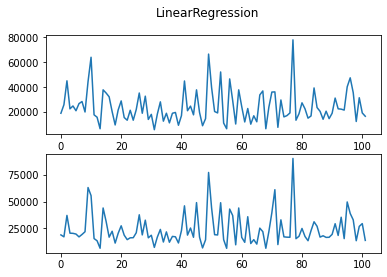

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('LinearRegression')
axs[0].plot(y_linear)
# fig.suptitle('actual data')
axs[1].plot(Y_validation)

# CatBoostRegressor

In [ ]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(X_train, Y_train)

Learning rate set to 0.037602
0:	learn: 16303.7543666	total: 46.5ms	remaining: 46.4s
1:	learn: 15977.5787863	total: 47ms	remaining: 23.5s
2:	learn: 15638.0103603	total: 47.4ms	remaining: 15.8s
3:	learn: 15351.3667010	total: 47.9ms	remaining: 11.9s
4:	learn: 15029.3817233	total: 48.4ms	remaining: 9.62s
5:	learn: 14758.4009131	total: 48.9ms	remaining: 8.1s
6:	learn: 14491.6425269	total: 49.4ms	remaining: 7s
7:	learn: 14230.5073637	total: 49.9ms	remaining: 6.18s
8:	learn: 13977.0884534	total: 50.4ms	remaining: 5.55s
9:	learn: 13737.9779057	total: 50.9ms	remaining: 5.04s
10:	learn: 13542.7548208	total: 51.3ms	remaining: 4.62s
11:	learn: 13343.6289450	total: 51.8ms	remaining: 4.26s
12:	learn: 13135.8720170	total: 52.2ms	remaining: 3.97s
13:	learn: 12958.4744367	total: 52.7ms	remaining: 3.71s
14:	learn: 12758.9348168	total: 53.2ms	remaining: 3.49s
15:	learn: 12568.3289340	total: 53.6ms	remaining: 3.3s
16:	learn: 12380.5807789	total: 54.1ms	remaining: 3.13s
17:	learn: 12199.6302673	total: 54.

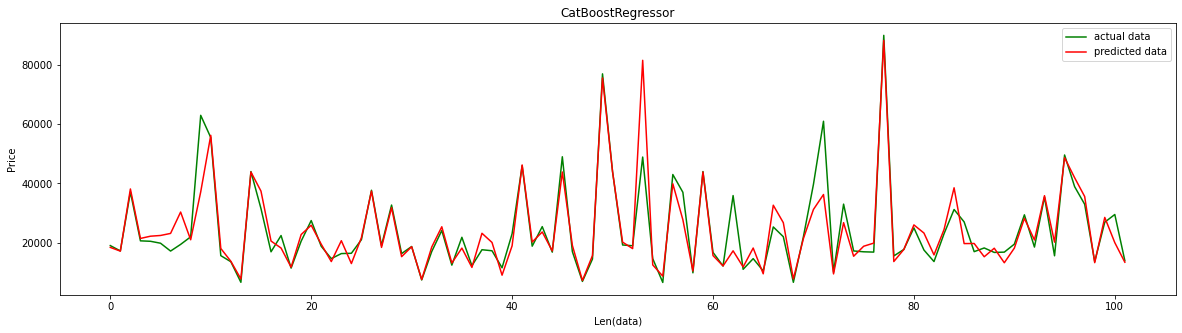

In [ ]:
Y_catboost = model.predict(X_validation)
plt.figure(figsize=(20,5))
plt.plot(Y_validation, 'g-', label='actual data')
plt.plot(Y_catboost, 'r-', label='predicted data')
plt.title('CatBoostRegressor')
plt.xlabel('Len(data)')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [ ]:
Y_catboost = model.predict(X_validation)
print(mean_absolute_error(Y_validation,Y_catboost))
print(r2_score(Y_catboost,Y_validation))

3222.0377457500063
0.8223561103601782


# Compare models

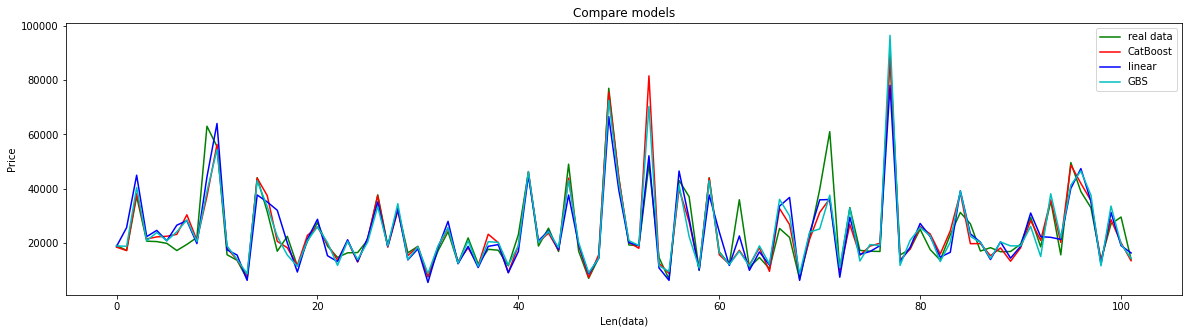

In [ ]:
ypred_rf = rf.predict(X_validation)
plt.figure(figsize=(20,5))
plt.plot(Y_validation, 'g-', label='real data')
plt.plot(Y_catboost, 'r-', label='CatBoost')
plt.plot(y_linear,'b-',label='linear')
plt.plot(y_GBR,'c-', label='GBS')
# plt.title('RandomForestRegressor')
plt.title('Compare models')
plt.xlabel('Len(data)')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()